# Problèmes inverses et ingénierie - approche stochastique et statistique

## Time-reversal refocusing in homogeneous and randomly heterogeneous media

Victor Jéséquel - Cyrielle Théobald

Imports

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### 1 - Paraxial approximation in a homogeneous medium.

**Objective :**
- What? Simulate the propagation of a Gaussian beam in a homogeneous medium
- How? Using the paraxial approximation of the Helmholtz equation : $u(x, z) = \phi(x, z)e^{ikz}$
- Compare numerical results with theoretical predictions.

**Theoretical Background:**

The paraxial wave equation (Schrödinger equation) for the complex amplitude $\phi$:
$$
2ik\partial_z\phi + \partial_x^2\phi = 0
$$
- **Initial condition** (Gaussian beam at \(z=0\)):
  $$
  \phi_0(x) = \exp\left(-\frac{x^2}{r_0^2}\right), \quad r_0 = 2
  $$
- **Fourier method**. We will solve the Schrödinger equation using the Fourier method:

![Title](fourier_method.png)

- **Theoretical transmitted wave** at \(z=L\):
  $$
  \phi_t(x) = \frac{r_0}{r_t}\exp\left(-\frac{x^2}{r_t^2}\right), \quad r_t = r_0\left(1 + 2i\frac{L}{kr_0^2}\right)^{1/2}
  $$

Parameters

In [19]:
radius = 2
N_points_x = 2**10
x_max = 60
k = 1
w = 1
L = 10
N_points_z = 100

Compute numerically the transmitted wave profile

In [20]:
# Spatial grid (x-axis and z-axis)
x = np.linspace(-x_max/2, x_max/2, N_points_x)
dx = x[1] - x[0]
z = np.linspace(0, L, N_points_z)
dz = z[1] - z[0]

# Initial gaussian at z = 0
phi_0 = np.exp(-x**2/(radius**2))

# Frequencies for the FFT
frequencies = 2*np.pi*np.fft.fftfreq(N_points_x, dx)

# Solving the Schrödinger equation using the Fourier method:
# 2ik dzψ + d²xψ = 0
phi = phi_0.copy() # At z = 0

for zi in z:
    phi_hat = np.fft.fft(phi)
    # Propagate in Fourier space
    phi_hat = phi_hat * np.exp(-1j * frequencies**2 * dz / (2 * k))
    phi = np.fft.ifft(phi_hat)

phi_t = phi # At z = L


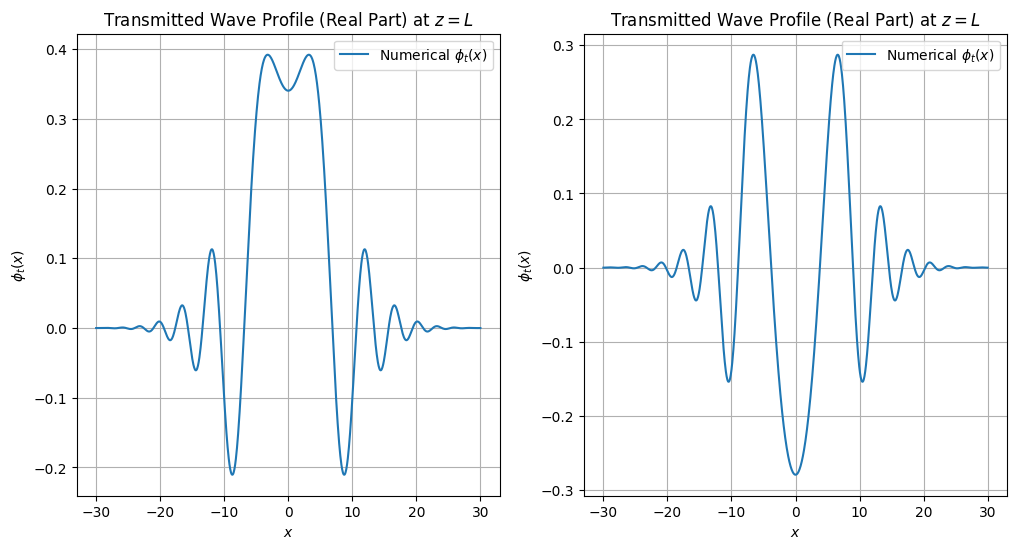

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Transmitted Wave Profile (Real Part)
axs[0].plot(x, np.real(phi_t), label=r"Numerical $\phi_t(x)$")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel(r"$\phi_t(x)$")
axs[0].set_title("Transmitted Wave Profile (Real Part) at $z = L$")
axs[0].legend()
axs[0].grid(True)

# Imaginary part
axs[1].plot(x, np.imag(phi_t), label=r"Numerical $\phi_t(x)$")
axs[1].set_xlabel("$x$")
axs[1].set_ylabel(r"$\phi_t(x)$")
axs[1].set_title("Transmitted Wave Profile (Real Part) at $z = L$")
axs[1].legend()
axs[1].grid(True)


Compare the numerical transmitted wave with the theoretical profile

In [22]:
# Check
rt = radius * np.sqrt(1 + 2j * L / (k * radius**2))
phi_t_theoretical = (radius / rt) * np.exp(-x**2 / rt**2)

# Check the square modulus
phi_t_sq_modulus = np.abs(phi_t)**2
phi_t_theoretical_sq_modulus = np.abs(phi_t_theoretical)**2

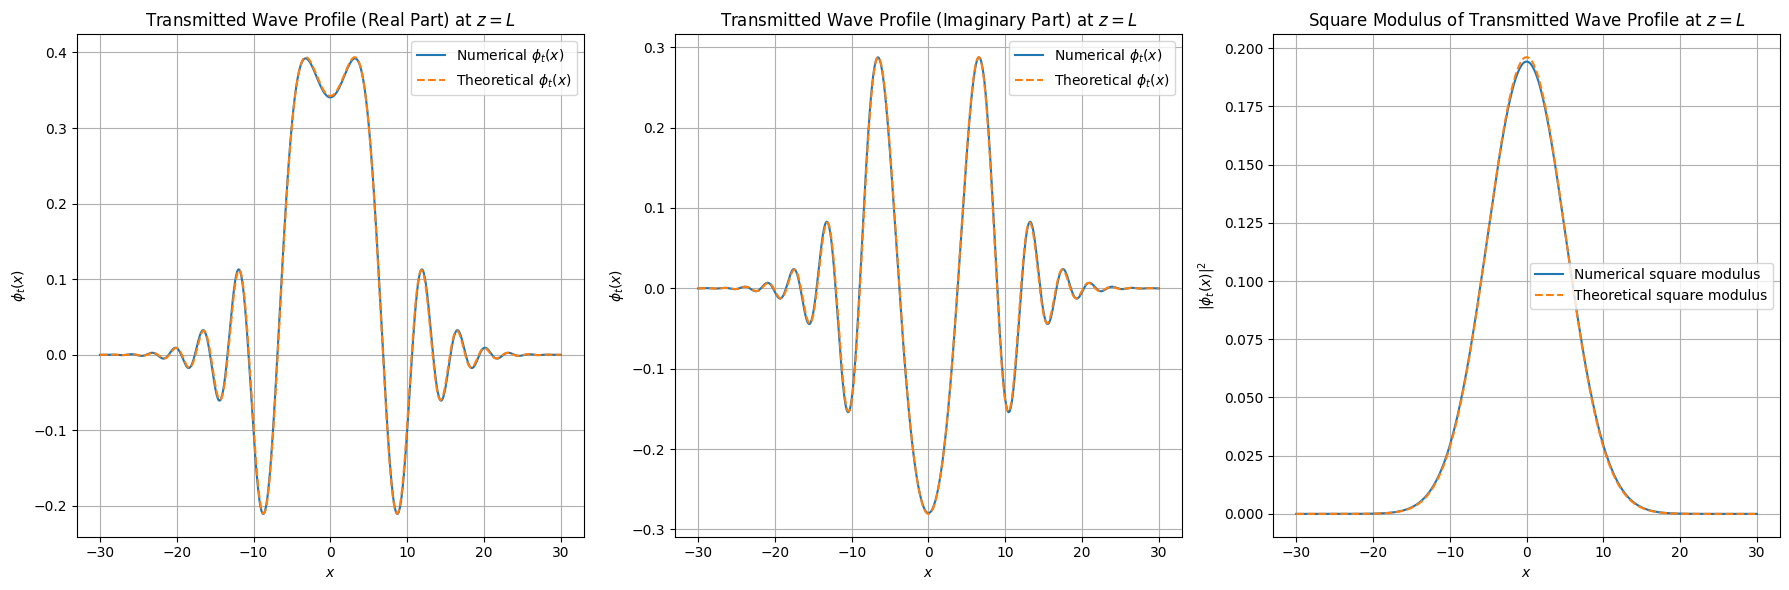

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Transmitted Wave Profile (Real Part)
axs[0].plot(x, np.real(phi_t), label=r"Numerical $\phi_t(x)$")
axs[0].plot(x, np.real(phi_t_theoretical), label=r"Theoretical $\phi_t(x)$", linestyle="--")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel(r"$\phi_t(x)$")
axs[0].set_title("Transmitted Wave Profile (Real Part) at $z = L$")
axs[0].legend()
axs[0].grid(True)

# Imaginary part
axs[1].plot(x, np.imag(phi_t), label=r"Numerical $\phi_t(x)$")
axs[1].plot(x, np.imag(phi_t_theoretical), label=r"Theoretical $\phi_t(x)$", linestyle="--")
axs[1].set_xlabel("$x$")
axs[1].set_ylabel(r"$\phi_t(x)$")
axs[1].set_title("Transmitted Wave Profile (Imaginary Part) at $z = L$")
axs[1].legend()
axs[1].grid(True)

# Square Modulus
axs[2].plot(x, phi_t_sq_modulus, label="Numerical square modulus")
axs[2].plot(x, phi_t_theoretical_sq_modulus, "--", label="Theoretical square modulus")
axs[2].set_xlabel("$x$")
axs[2].set_ylabel(r"$|\phi_t(x)|^2$")
axs[2].set_title("Square Modulus of Transmitted Wave Profile at $z = L$")
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

**Let's compute the theoretical wave profile**

1) DFT:
$$
\hat{\Phi}_0(f) = \int_{\mathbb{R}} e^{-x^2/r_0^2} e^{i f x} dx = \sqrt{\pi r_0^2} e^{-f^2 r_0^2 /4}
$$

2) Exploding ODE:
$$
2i k \partial _z \Phi + \partial^2_x \Phi = 0 
\Rightarrow 2i k \partial _z \hat{\Phi} + f^2 \hat{\Phi} = 0
$$

Its solution is:
$$
\hat{\Phi}(z, f) = \hat{\Phi}_0(f) e^{- \frac{i f^2 z}{2k}}
= r_0 \sqrt{\pi} e^{- \frac{f^2 r_0^2}{4} \left( 1 + \frac{2iz}{k r_0^2} \right)}
$$

3) IFT:
$$
\Phi(z,x) = \frac{1}{2\pi} \int_{\mathbb{R}} \hat{\Phi}(z,f) e^{-if x} df
$$

$$
= \frac{r_0 \sqrt{\pi}}{2 \pi} \int_{\mathbb{R}} \exp \left[ -\frac{f^2 r_0^2}{4} \left( 1 + \frac{2iz}{k r_0^2} \right) - if x \right] df
$$

$$
= \frac{r_0}{2 \sqrt{\pi}} \frac{\sqrt{\pi}}{\sqrt{(\frac{r_0^2}{4})(1+\frac{2iz}{k r_0^2})}}\exp \left[ \frac{-x^2}{r_0^2(1+\frac{2iz}{k r_0^2})} \right]
$$

Finally, we have:
$$
\Phi(z,x) = \frac{r_0}{r_t} \exp \left( -\frac{x^2}{r_t^2} \right)
$$

With:
$$
r_t = r_0\sqrt{1 + \frac{2iz}{k r_0^2}}
$$

### 2 - Time reversal for time-harmonic waves in a homogeneous medium.

**Objective:**
- Study refocusing of a time-reversed wave using a compactly supported mirror at $z=L$.

**Theoretical Background:**

**Time-Reversal Principle**
Time-reversal refocusing exploits the invariance of the wave equation under time reversal $t \rightarrow -t$. For time-harmonic waves, this corresponds to taking the complex conjugate of the wave field $\phi$:
$$
\phi^{tr}(x, z) = \overline{\phi(x, z)}.
$$

#### **Gaussian Mirror Function**
The time-reversed wave is truncated by a mirror $\chi_M(x)$ at $z = L$:
$$
\phi^{tr}(z=L, x) = \overline{\phi_t(x)} \cdot \chi_M(x),
$$
where $\phi_t(x) = \phi(L, x)$ is the transmitted wave from Part 1, and $\chi_M(x)$ is a Gaussian mirror:
$$
\chi_M(x) = \exp\left(-\frac{x^2}{r_M^2}\right).
$$

**Propagation**:  
   The wave evolves according to the paraxial equation $\partial_z \phi^{tr} = \frac{i}{2k} \partial_x^2 \phi^{tr}$. Using the Fourier transform method (as in Part 1), the refocused wave at $z = 2L$ is:
   $$
   \phi^{tr}_r(x) = \frac{1}{a_{tr}} \exp\left(-\frac{x^2}{r_{tr}^2}\right),
   $$
   where:
   $$
   r_{tr}^2 = \left(\frac{1}{r_M^2} + \frac{1}{r_0^2 - 2iL/k}\right)^{-1} + 2i\frac{L}{k},
   $$
   $$
   a_{tr} = \sqrt{1 + \frac{4L^2}{k^2 r_0^2 r_M^2} + 2i\frac{L}{k r_M^2}}.
   $$

In [30]:
z = np.linspace(L, 2*L, N_points_z)
dz = z[1] - z[0]

def time_reversal_mirror(x, r_M):
    """Time-reversal mirror in the plane z=L"""
    ksi = (1 - (x / (2*r_M))**2)**2
    indicator = np.abs(x) <= 2*r_M
    return ksi*indicator

def time_reversal_mirror_gaussian(x, r_M):
    """Gaussian time-reversal mirror"""
    return np.exp(-x**2 / r_M**2)

def time_reversal_experiment(phi_t, r_M, gaussian_mirror = False):
    """Perform time-reversal experiment."""

    # Time-reversed wave at z = L
    if not gaussian_mirror:
        phi_tr_L = np.conj(phi_t) * time_reversal_mirror(x, r_M)
    else :
        phi_tr_L = np.conj(phi_t) * time_reversal_mirror_gaussian(x, r_M)

    # Propagate phi_tr from z = L to z = 2L
    phi_tr = phi_tr_L.copy()
    for zi in z:
        phi_tr_hat = np.fft.fft(phi_tr)
        phi_tr_hat = phi_tr_hat * np.exp(-1j * frequencies**2 * dz / (2 * k))
        phi_tr = np.fft.ifft(phi_tr_hat)

    return phi_tr

r_M_list = [2, 5, 10, 15, 20]
refocused_wave_list = []

for r_M in r_M_list:
    refocused_wave = time_reversal_experiment(phi_t, r_M)
    refocused_wave_list.append(refocused_wave)

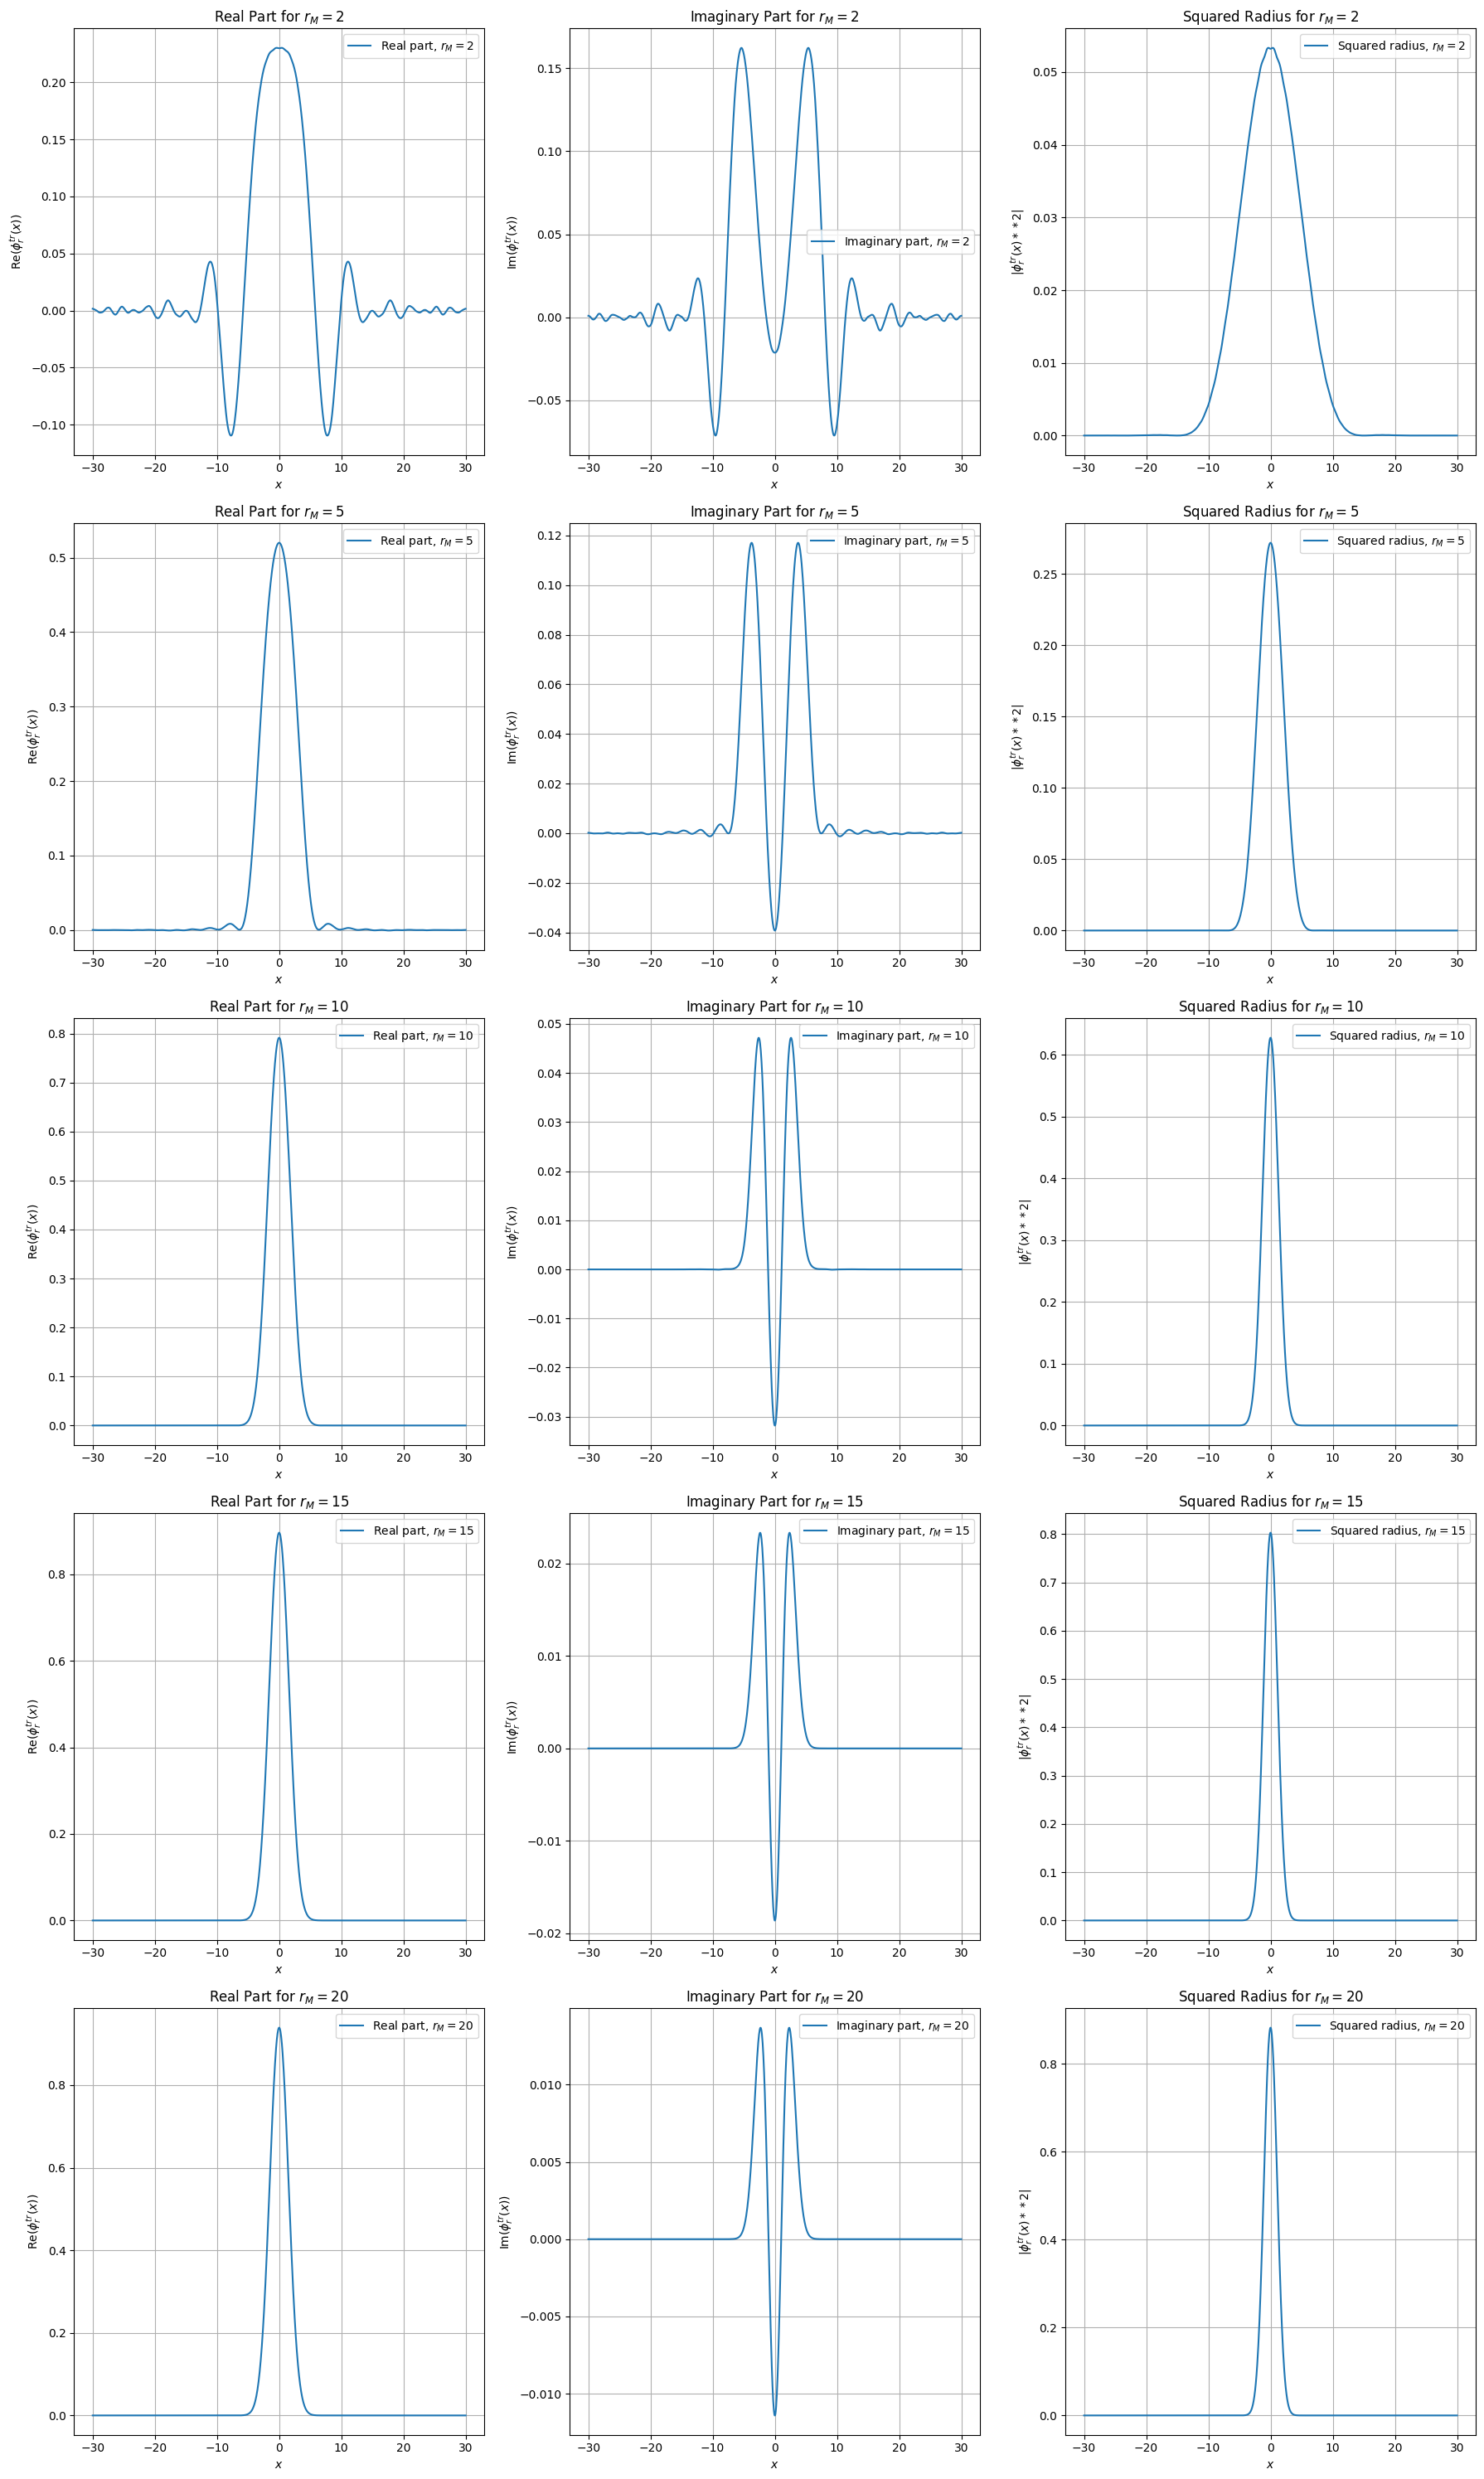

In [31]:
fig, axs = plt.subplots(len(r_M_list), 3, figsize=(18, 6 * len(r_M_list)))

for i, r_M in enumerate(r_M_list):
    # Real part
    axs[i, 0].plot(x, np.real(refocused_wave_list[i]), label=f"Real part, $r_M = {r_M}$")
    axs[i, 0].set_xlabel("$x$")
    axs[i, 0].set_ylabel(r"Re($\phi^{tr}_r(x)$)")
    axs[i, 0].set_title(f"Real Part for $r_M = {r_M}$")
    axs[i, 0].legend()
    axs[i, 0].grid(True)

    # Imaginary part
    axs[i, 1].plot(x, np.imag(refocused_wave_list[i]), label=f"Imaginary part, $r_M = {r_M}$")
    axs[i, 1].set_xlabel("$x$")
    axs[i, 1].set_ylabel(r"Im($\phi^{tr}_r(x)$)")
    axs[i, 1].set_title(f"Imaginary Part for $r_M = {r_M}$")
    axs[i, 1].legend()
    axs[i, 1].grid(True)

    # Squared Radius
    axs[i, 2].plot(x, np.abs(refocused_wave_list[i])**2, label=f"Squared radius, $r_M = {r_M}$")
    axs[i, 2].set_xlabel("$x$")
    axs[i, 2].set_ylabel(r"$|\phi^{tr}_r(x)**2|$")
    axs[i, 2].set_title(f"Squared Radius for $r_M = {r_M}$")
    axs[i, 2].legend()
    axs[i, 2].grid(True)

plt.tight_layout()
plt.show()

Check with the theoretical refocused wave profile :

**Let's compute the theoretical transmitted wave profile:**

**1) Gaussian Mirror :**

We start at $z=L$, with the wave profile $\Phi_t(x) = \frac{r_0}{r_t} \exp(-\frac{x^2}{r_t^2})$ with $r_t = r_0(1+\frac{2iL}{kr_0^2})^{-1/2}$

Gaussian mirror : The wave profile transmitted through the gaussian mirror is
$$
\Phi^{tr}(z=L, x) = \Phi_t(x)^* \chi_M(x)
$$
$$
=  \Phi_t(x)^* \exp(-\frac{x^2}{r_M^2})
$$
$$
= \frac{r_0}{r_t^*}\exp(-x^2(\frac{1}{{r_t^*}^2}+\frac{1}{r_M^2}))
$$

**2) DFT:**

$$
\hat \Phi^{tr}(z=L, f) = \int \Phi^{tr}(z=L, x)e^{ifx}
$$
$$
= \frac{r_0}{r_t^*} \int \exp \left[ -x^2(\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2}) + ifx \right]
$$

$$
= \frac{r_0}{r_t^*} \sqrt{\frac{\pi}{\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2}}} \exp \left[-\frac{f^2}{4}\frac{1}{\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2}} \right]
$$

**3) Exploding ODE:**

$$
\hat \Phi^{tr}(z=2L, f) = \hat \Phi^{tr}(z=L, f)e^{-\frac{if^2}{2k}L}
$$
$$
= \frac{r_0}{r_t^*} \sqrt{\frac{\pi}{\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2}}} \exp \left[ -\frac{f^2}{4} \left(\frac{1}{\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2}} + \frac{2iL}{k} \right) \right]
$$

**4) IFT:**

$$
\Phi^{tr}(z=2L, x) = \frac{1}{2\pi} \int{
    \hat \Phi^{tr}(z=2L, f) e^{-ifx} df
    }
$$
$$
= \frac{1}{2\pi}\frac{r_0}{r_t^*} \sqrt{\frac{\pi}{\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2}}}
\int{
    \exp \left[ -\frac{f^2}{4} \left(\frac{1}{\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2}} + \frac{2iL}{k} \right) -ifx \right] df
}
$$

$$
= \frac{1}{2\pi}\frac{r_0}{r_t^*} \sqrt{\frac{\pi}{\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2}}} \frac{\sqrt{4\pi}}{\sqrt{\frac{1}{\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2}} + \frac{2iL}{k}}} \exp \left[\frac{-x^2}{\frac{1}{\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2}} + \frac{2iL}{k}}\right]
$$

$$
= \frac{r_0}{r_t^*} \sqrt{\frac{1}{(\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2})(\frac{1}{\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2}} + \frac{2iL}{k})}} \exp \left[\frac{-x^2}{\frac{1}{\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2}} + \frac{2iL}{k}}\right]
$$

$$
= \frac{r_0}{r_t^*} \sqrt{
    \frac{1}{1+(\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2})\frac{2iL}{k}}
    }
\exp \left[\frac{-x^2}{\frac{1}{\frac{1}{{r_t^*}^2} + \frac{1}{r_M^2}} + \frac{2iL}{k}}\right]
$$
$$
= \frac{1}{\sqrt{1-\frac{2iL}{kr_0^2}} \sqrt{
    1+\frac{2iL}{kr_M^2} + \frac{2iL}{kr_0^2(1-\frac{2iL}{kr_0^2})}
    }}
\exp \left[\frac{-x^2}{\frac{2iL}{k} + \frac{1}{
    \frac{1}{r_0^2(1-\frac{2iL}{kr_0^2})} + \frac{1}{r_M^2}
}}\right]
$$

$$
= \frac{1}{\sqrt{1 +\frac{2iL}{k}(\frac{1}{r_M^2}- \frac{1}{r_0^2}) + \frac{4L^2}{k^2r_0^2r_M^2} + \frac{2iL}{kr_0^2}}}
\exp \left[\frac{-x^2}{\frac{2iL}{k} + \frac{1}{
    \frac{1}{r_0^2(1-\frac{2iL}{kr_0^2})} + \frac{1}{r_M^2}
}}\right]
$$

$$
= \frac{1}{\sqrt{1 +\frac{2iL}{k r_M^2} + \frac{4L^2}{k^2r_0^2r_M^2}}}
\exp \left[\frac{-x^2}{\frac{2iL}{k} + \frac{1}{
    \frac{1}{r_0^2(1-\frac{2iL}{kr_0^2})} + \frac{1}{r_M^2}
}}\right]
$$

Finally,
$$
\Phi^{tr}(L, x) = \frac{1}{a_{tr}}\exp(-\frac{x^2}{r_{tr}^2})
$$
With
$
r_{tr}^2 = \frac{2iL}{k} + \left(\frac{1}{r_0^2(1-\frac{2iL}{kr_0^2})} + \frac{1}{r_M^2} \right)^{-1}
$
and
$
a_{tr} = \left(1 +\frac{2iL}{k r_M^2} + \frac{4L^2}{k^2r_0^2r_M^2}\right)^{1/2}
$

In [32]:
r_M = 20
phi_tr_numerical = time_reversal_experiment(phi_t, r_M, gaussian_mirror=True)

# Theoretical refocused wave profile with r_M = 20
r_tr_squared = 1/(1 / r_M**2 + 1 / (radius**2 - 2j * L / k)) + 2j * L / k
a_tr = np.sqrt(1 + 4 * L**2 / (k**2 * radius**2 * r_M**2) + 2j * L / (k * r_M**2))

phi_tr_r_theoretical = (1 / a_tr) * np.exp(-x**2 / r_tr_squared)

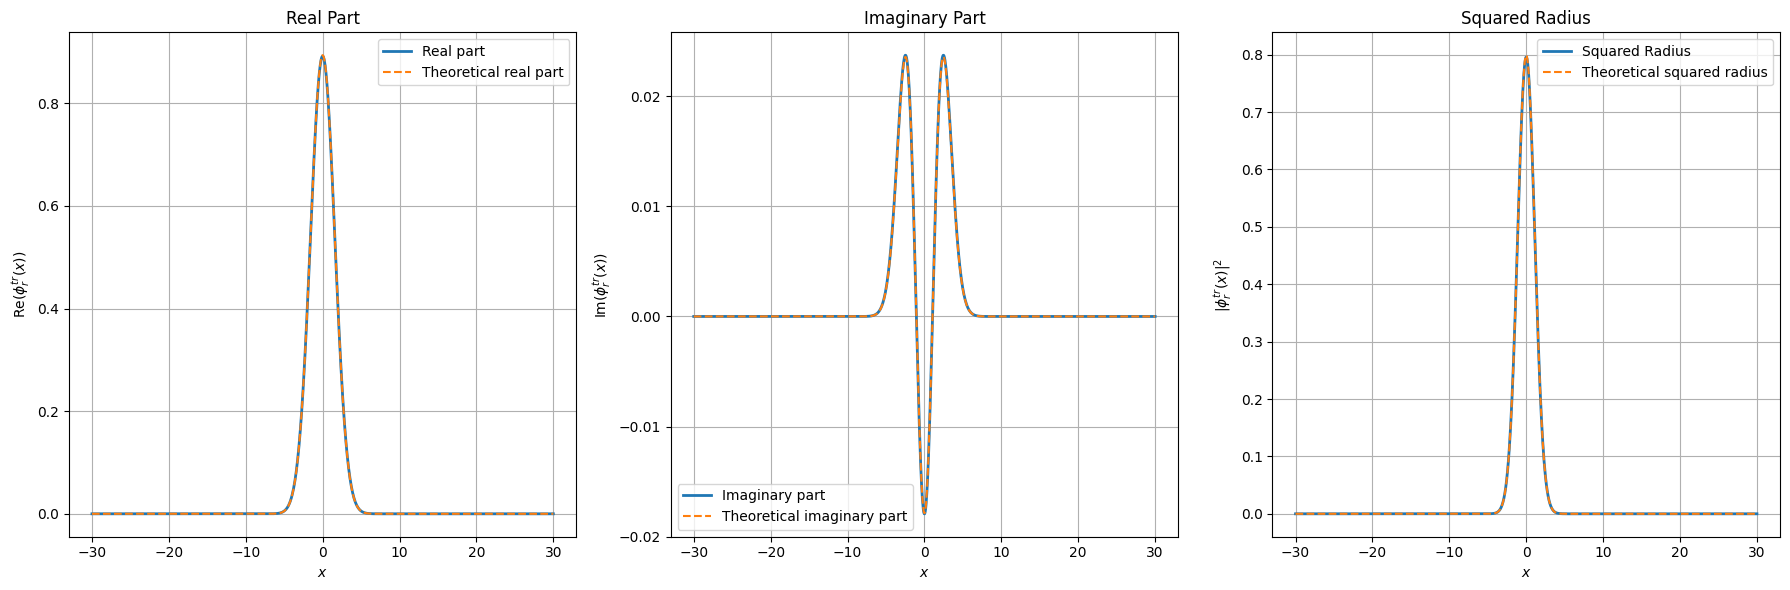

In [33]:
# Plotting the results
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Real part
axs[0].plot(x, np.real(phi_tr_numerical), label="Real part", linewidth=2)
axs[0].plot(x, np.real(phi_tr_r_theoretical), "--", label="Theoretical real part")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel(r"Re($\phi^{tr}_r(x)$)")
axs[0].set_title("Real Part")
axs[0].legend()
axs[0].grid(True)

# Imaginary part
axs[1].plot(x, np.imag(phi_tr_numerical), label="Imaginary part", linewidth=2)
axs[1].plot(x, np.imag(phi_tr_r_theoretical), "--", label="Theoretical imaginary part")
axs[1].set_xlabel("$x$")
axs[1].set_ylabel(r"Im($\phi^{tr}_r(x)$)")
axs[1].set_title("Imaginary Part")
axs[1].legend()
axs[1].grid(True)

# Squared Radius
axs[2].plot(x, np.abs(phi_tr_numerical)**2, label="Squared Radius", linewidth=2)
axs[2].plot(x, np.abs(phi_tr_r_theoretical)**2, "--", label="Theoretical squared radius")
axs[2].set_xlabel("$x$")
axs[2].set_ylabel(r"$|\phi^{tr}_r(x)|^2$")
axs[2].set_title("Squared Radius")
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

# GPU

In [25]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Hyperparamètres

# Grille spatiale
x_max = 60.0
N_points_x = 2**10
x = cp.linspace(-x_max/2, x_max/2, N_points_x)

# params gaussienne initiale
radius = 2.0

# params propagation
L = 10.0     # distance totale en z
h = 1 # pas en z (ici z_c = h = 1)
N_z = int(L/h)
k = 1.0      # avec c₀ = 1

# params potentiel aléatoire
sigma = 1.0
x_c = 4.0    # corrélation spatiale en x
z_c = h      # corrélation en z (ici 1)


# Fonctions communes avec CuPy pour accélérer les calculs via GPU

def generate_random_potential_cupy(N, x, x_c, sigma):
    N_points = x.shape[0]
    mu = cp.empty((N, N_points), dtype=cp.float64)
    X1 = x[:, None]
    X2 = x[None, :]

    # covariance
    cov_matrix = sigma**2 * cp.exp(-((X1 - X2)**2) / (x_c**2))

    # reg diagonale
    cov_matrix += 1e-12 * cp.eye(N_points, dtype=cp.float64)

    # factorisation de Cholesky
    L_chol = cp.linalg.cholesky(cov_matrix)

    for n in range(N):
        z_rand = cp.random.randn(N_points)  # tirage gaussien standard
        mu[n, :] = L_chol @ z_rand
    return mu

def split_step_fourier_random_cupy(phi0, k, h, L, x, mu):
    """
    Propagation par split-step pour l'équation de Schrödinger en milieu aléatoire :
      ∂z φ = i/(2k) ∂²x φ + i(k/2) μ(z,x) φ.
    Ici, μ(z,x) est supposé constant sur chaque tranche [z, z+h).
    """
    N_points = x.shape[0]
    dx = x[1] - x[0]
    freq = 2 * cp.pi * cp.fft.fftfreq(N_points, d=dx)
    phi = phi0.copy()
    N_steps = int(L/h)
    for iz in range(N_steps):
        # potentiel
        phi = phi * cp.exp(1j * (k/2) * mu[iz, :])
        # diffraction
        phi_hat = cp.fft.fft(phi)
        phi_hat *= cp.exp(-1j * (freq**2 / (2*k)) * h)
        phi = cp.fft.ifft(phi_hat)
    return phi

def split_step_fourier_TR_random_cupy(phi0, k, h, L, x, mu_TR):
    """
    Propagation pour time reversal dans un milieu aléatoire :
      ∂z φ_tr = i/(2k) ∂²x φ_tr + i(k/2) μ(2L-z,x) φ_tr,
    où mu_TR = flipud(μ).
    """
    N_points = x.shape[0]
    dx = x[1] - x[0]
    freq = 2 * cp.pi * cp.fft.fftfreq(N_points, d=dx)
    phi = phi0.copy()
    N_steps = int(L/h)
    for iz in range(N_steps):
        phi = phi * cp.exp(1j * (k/2) * mu_TR[iz, :])
        phi_hat = cp.fft.fft(phi)
        phi_hat *= cp.exp(-1j * (freq**2 / (2*k)) * h)
        phi = cp.fft.ifft(phi_hat)
    return phi

def split_step_fourier_TR_homogeneous_cupy(phi0, k, h, L, x):
    """
    Propagation pour time reversal dans un milieu homogène (sans potentiel) :
      ∂z φ_tr = i/(2k) ∂²x φ_tr.
    """
    N_points = x.shape[0]
    dx = x[1] - x[0]
    freq = 2 * cp.pi * cp.fft.fftfreq(N_points, d=dx)
    phi = phi0.copy()
    N_steps = int(L/h)
    for iz in range(N_steps):
        phi_hat = cp.fft.fft(phi)
        phi_hat *= cp.exp(-1j * (freq**2 / (2*k)) * h)
        phi = cp.fft.ifft(phi_hat)
    return phi

### 3 - Paraxial approximation in a random medium.

**Objective**
- Simulate wave propagation in a random medium.
- Compare the mean transmitted wave with theoretical predictions.

**Theoretical Framework**

Equation: The paraxial wave equation in random media:

$$
\partial_z\phi = \underbrace{\frac{i}{2k}\partial_x^2\phi}_{\text{Diffraction}} + \underbrace{\frac{ik}{2}\mu(z,x)\phi}_{\text{Random Scattering}}
$$

Where $\mu(z,x) = \mu_n(x) \quad$ for $\quad z \in [n z_c, (n+1) z_c]$,
and $\mu_0(x), \mu_1(x), \dots, \mu_{\lfloor L / z_c \rfloor}(x)$ are independent realizations of a Gaussian process with mean zero and covariance function $E[\mu_n(x) \mu_n(x')] = \sigma^2 \exp\left(-\frac{(x - x')^2}{x_c^2}\right)$

Q3 GPU: 100%|██████████| 100/100 [00:00<00:00, 104.39it/s]


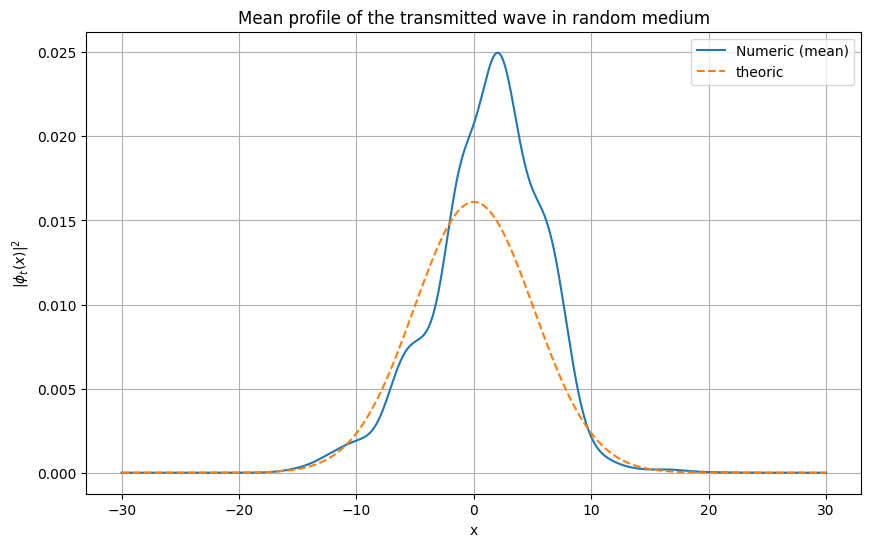

In [26]:
num_realizations_Q3 = 100
phi_t_runs = []

for i in tqdm(range(num_realizations_Q3), desc="Q3 GPU"):
    mu = generate_random_potential_cupy(N_z, x, x_c, sigma)
    phi0 = cp.exp(-x**2 / (radius**2))
    phi_t = split_step_fourier_random_cupy(phi0, k, h, L, x, mu)
    phi_t_runs.append(phi_t)
phi_t_runs = cp.array(phi_t_runs)
phi_t_mean = cp.mean(phi_t_runs, axis=0)

# Théorique
gamma_0 = sigma**2 * z_c
rt = radius * cp.sqrt(1 + 2j * L / (k * radius**2))
phi_t_theo = (radius / rt) * cp.exp(-x**2 / rt**2) * cp.exp(-gamma_0 * k**2 * L / 8)

# Affichage
x_cpu = cp.asnumpy(x)
phi_t_mean_cpu = cp.asnumpy(cp.abs(phi_t_mean)**2)
phi_t_theo_cpu = cp.asnumpy(cp.abs(phi_t_theo)**2)

plt.figure(figsize=(10,6))
plt.plot(x_cpu, phi_t_mean_cpu, label="Numeric (mean)")
plt.plot(x_cpu, phi_t_theo_cpu, '--', label="theoric")
plt.xlabel("x")
plt.ylabel(r"$|\phi_t(x)|^2$")
plt.title("Mean profile of the transmitted wave in random medium")
plt.legend()
plt.grid(True)
plt.show()

The reconstruction is fairly approximate; we can try increasing the number of realizations.

Q3 GPU: 100%|██████████| 10000/10000 [01:26<00:00, 115.57it/s]


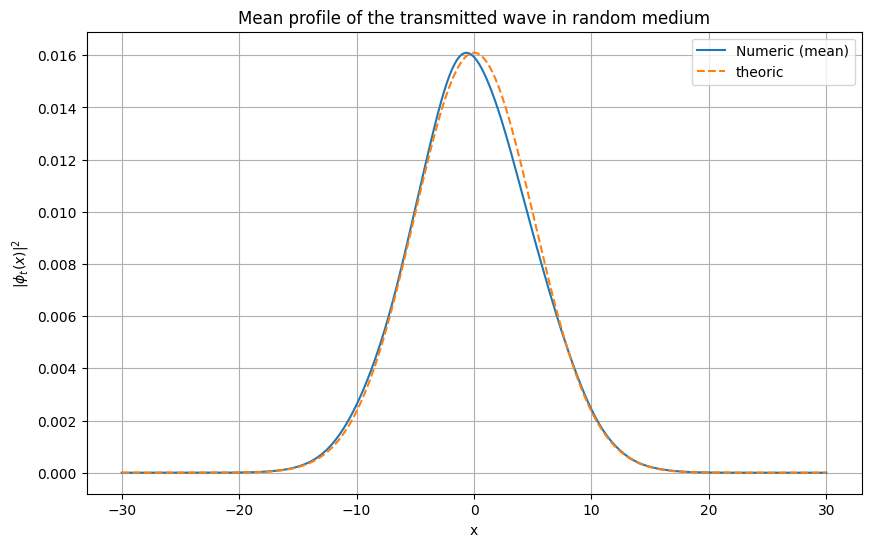

In [14]:
num_realizations_Q3 = 10000
phi_t_runs = []

for i in tqdm(range(num_realizations_Q3), desc="Q3 GPU"):
    mu = generate_random_potential_cupy(N_z, x, x_c, sigma)
    phi0 = cp.exp(-x**2 / (radius**2))
    phi_t = split_step_fourier_random_cupy(phi0, k, h, L, x, mu)
    phi_t_runs.append(phi_t)
phi_t_runs = cp.array(phi_t_runs)
phi_t_mean = cp.mean(phi_t_runs, axis=0)

# Théorique
gamma_0 = sigma**2 * z_c
rt = radius * cp.sqrt(1 + 2j * L / (k * radius**2))
phi_t_theo = (radius / rt) * cp.exp(-x**2 / rt**2) * cp.exp(-gamma_0 * k**2 * L / 8)

# Affichage
x_cpu = cp.asnumpy(x)
phi_t_mean_cpu = cp.asnumpy(cp.abs(phi_t_mean)**2)
phi_t_theo_cpu = cp.asnumpy(cp.abs(phi_t_theo)**2)

plt.figure(figsize=(10,6))
plt.plot(x_cpu, phi_t_mean_cpu, label="Numeric (mean)")
plt.plot(x_cpu, phi_t_theo_cpu, '--', label="theoric")
plt.xlabel("x")
plt.ylabel(r"$|\phi_t(x)|^2$")
plt.title("Mean profile of the transmitted wave in random medium")
plt.legend()
plt.grid(True)
plt.show()

With 100 realizations, the blue numerical curve still exhibits oscillations and does not match the theoretical curve perfectly. This is normal, as there remains a non-negligible statistical variance.

With 10,000 realizations, the law of large numbers comes into play much more strongly, and the numerical mean converges closely to the theoretical formula.

In short, the more realizations we use, the more the mean transmitted field converges toward the analytical solution.

### 4- Time reversal for time-harmonic waves in a random medium.


Consider a Gaussian time-reversal mirror in the plane \(z = L\):
$$\chi_M(x) = \exp\bigl(-x^2 / r_M^2\bigr).$$

Perform a time-reversal experiment: Transmit the time-reversed wave \(\phi_t\) in the same random medium (i.e., the wave travels through the same medium as in (3)):

$$
\partial_z \phi^{tr} \;=\; \frac{i}{2k}\,\partial_x^2 \phi^{tr} \;+\; \frac{i\,k}{2}\,\mu(2L - z, x)\,\phi^{tr},
\quad
\phi^{tr}(z = L, x) = \phi_t(x)\,\chi_M(x).
$$

and compute the refocused wave
$$\phi_r^{tr}(x) \;=\; \phi^{tr}\bigl(z = 2L, x\bigr)$$
in the plane \(z = 2L\).

Check numerically that the mean refocused wave profile is given by
$$
\mathbb{E}\bigl[\phi_r^{tr}(x)\bigr]
\;=\;
\frac{1}{a_{\mathrm{tr}}}\,
\exp\!\Bigl(-\frac{x^2}{r_{\mathrm{tr}}^2}\Bigr)\,
\exp\!\Bigl(-\frac{x^2}{r_a^2}\Bigr),
$$

with
$$
r_a^{-2} \;=\; \gamma_2\,\omega^2\,\frac{L}{48},
\quad
\gamma_2 \;=\; \frac{2\,\sigma^2\,z_c}{x_c^2}.
$$

Try different values for the radius \(r_M\) of the mirror. Note that refocusing becomes significantly better in the random medium case than in the homogeneous medium case when the mirror is relatively small (say \(r_M = 2\)).

Perform another time-reversal experiment: Transmit the time-reversed wave \(\phi_t\) in a homogeneous medium:

$$
\partial_z \phi^{tr} \;=\; \frac{i}{2k}\,\partial_x^2 \phi^{tr},
\quad
\phi^{tr}(z = L, x) = \phi_t(x)\,\chi_M(x),
$$

and compute the refocused wave
$$\phi_r^{tr}(x) \;=\; \phi^{tr}\bigl(z = 2L, x\bigr)$$
in the plane \(z = 2L\).

Check numerically that the mean refocused wave profile is given by
$$
\mathbb{E}\bigl[\phi_r^{tr}(x)\bigr]
\;=\;
\frac{1}{a_{\mathrm{tr}}}\,
\exp\!\Bigl(-\frac{x^2}{r_{\mathrm{tr}}^2}\Bigr)\,
\exp\!\Bigl(-\frac{\gamma_0\,\omega^2\,L}{8}\Bigr).
$$

Q4 GPU: 100%|██████████| 100/100 [00:01<00:00, 80.38it/s]


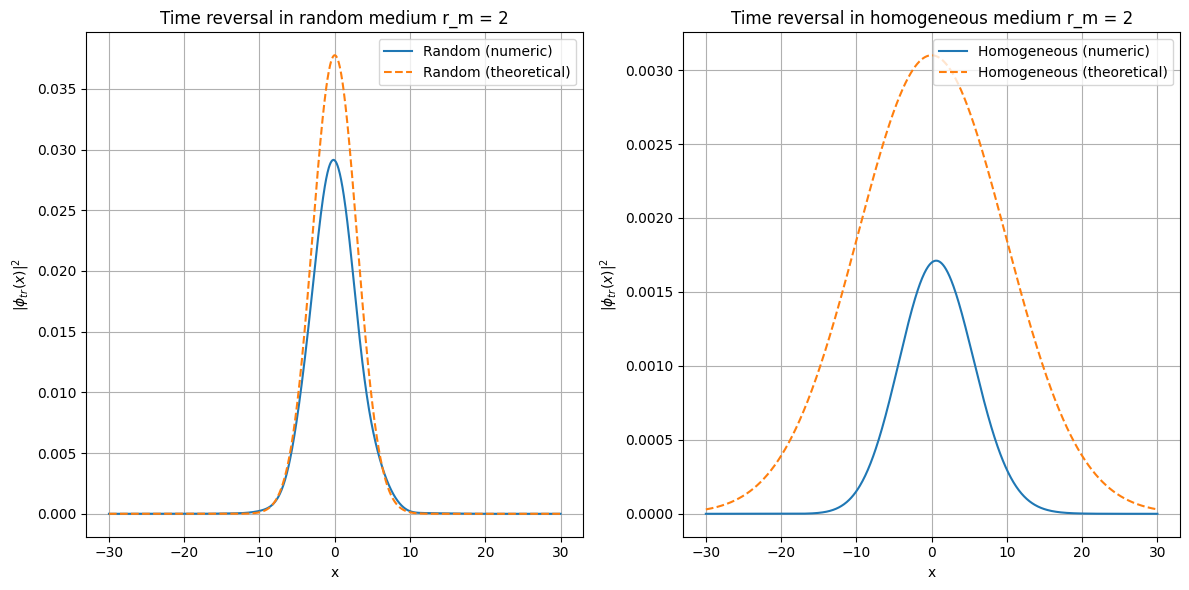

Q4 GPU: 100%|██████████| 100/100 [00:01<00:00, 85.48it/s]


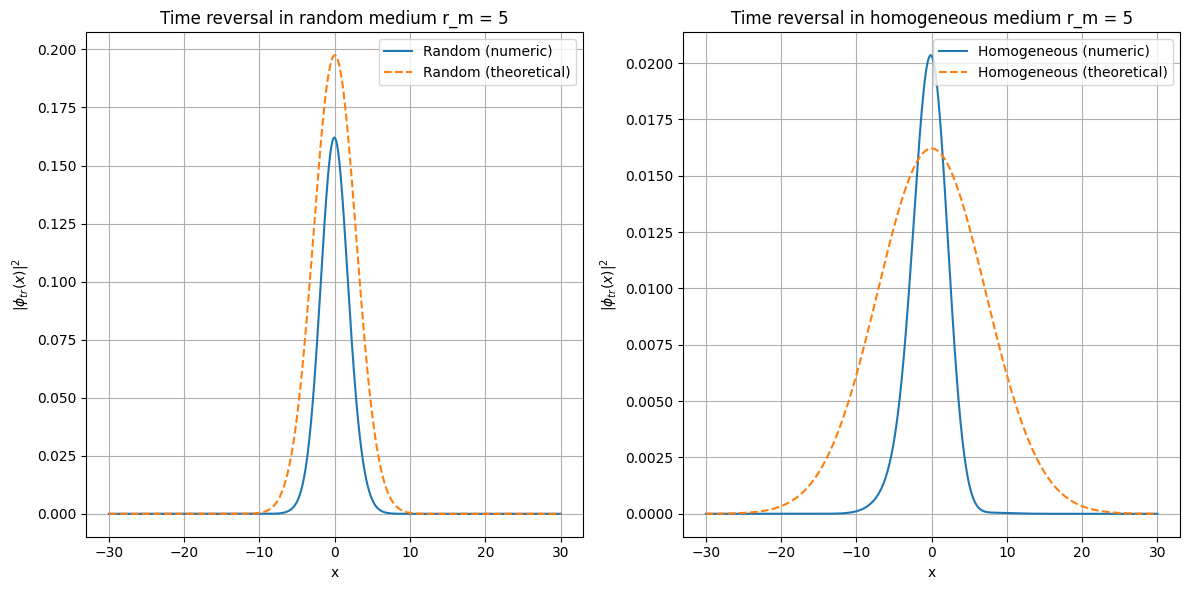

Q4 GPU: 100%|██████████| 100/100 [00:01<00:00, 81.45it/s]


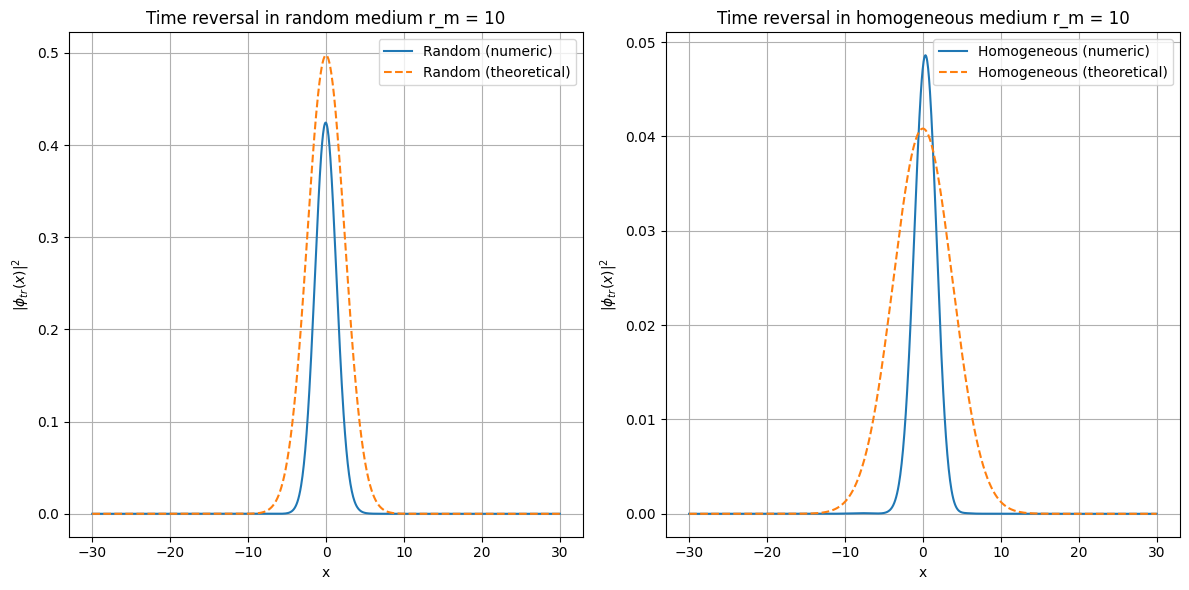

Q4 GPU: 100%|██████████| 100/100 [00:01<00:00, 85.29it/s]


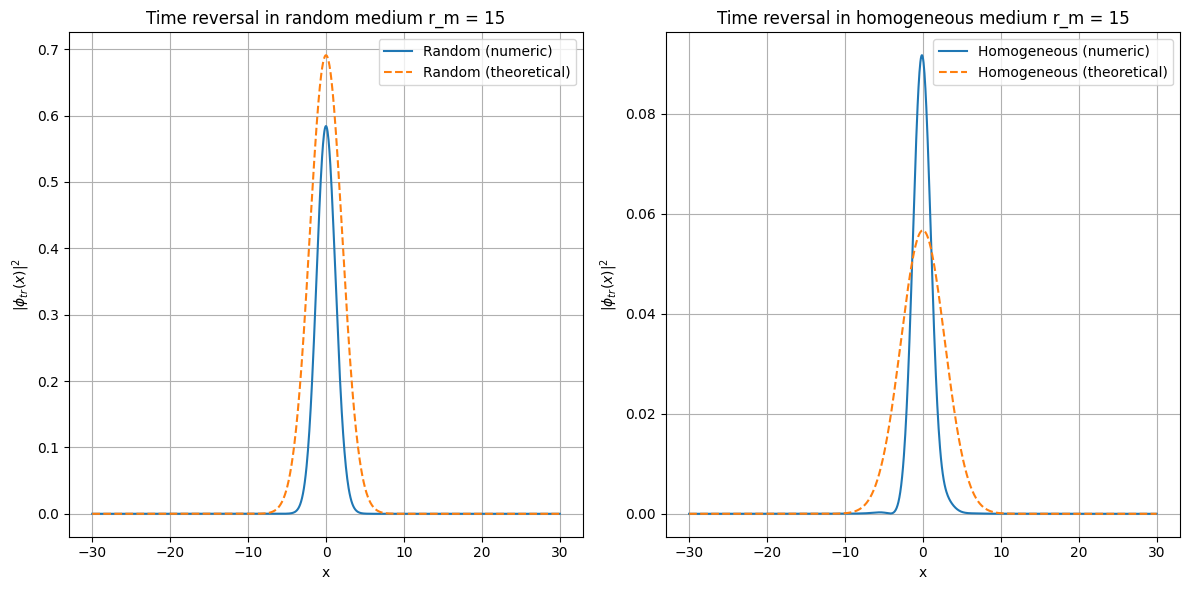

Q4 GPU: 100%|██████████| 100/100 [00:01<00:00, 84.42it/s]


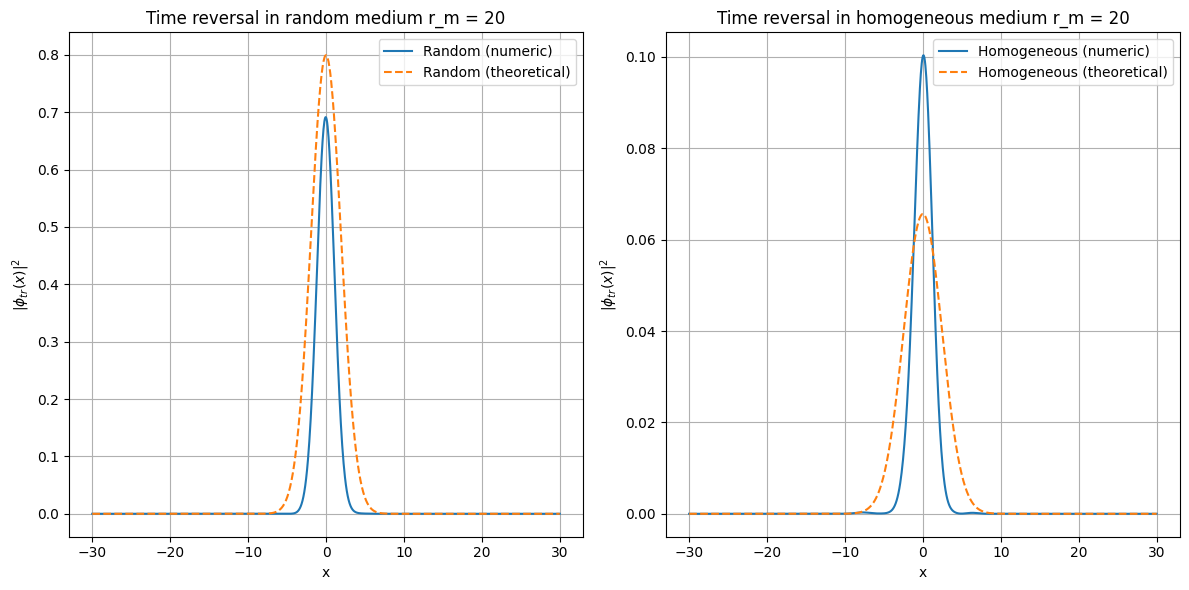

In [22]:
num_realizations_Q4 = 100
# r_M = 2.0  # rayon du miroir TR
r_M_list = [2, 5, 10, 15, 20]
for r_M in r_M_list:
  phi_tr_random_runs = []
  phi_tr_homogeneous_runs = []

  for i in tqdm(range(num_realizations_Q4), desc="Q4 GPU"):
      mu = generate_random_potential_cupy(N_z, x, x_c, sigma)
      phi0 = cp.exp(-x**2 / (radius**2))
      # propagation directe en milieu aléatoire
      phi_t = split_step_fourier_random_cupy(phi0, k, h, L, x, mu)
      # miroir TR gaussien
      chi_M = cp.exp(-x**2 / (r_M**2))
      phi_tr_L = cp.conj(phi_t) * chi_M
      # potentiel renversé pour propagation en time reversal en milieu aléatoire
      mu_TR = cp.flipud(mu)
      phi_tr_random = split_step_fourier_TR_random_cupy(phi_tr_L, k, h, L, x, mu_TR)
      phi_tr_random_runs.append(phi_tr_random)

      # propagation en time reversal en milieu homogène (sans potentiel)
      phi_tr_homogeneous = split_step_fourier_TR_homogeneous_cupy(phi_tr_L, k, h, L, x)
      phi_tr_homogeneous_runs.append(phi_tr_homogeneous)

  phi_tr_random_runs = cp.array(phi_tr_random_runs)
  phi_tr_random_mean = cp.mean(phi_tr_random_runs, axis=0)
  phi_tr_homogeneous_runs = cp.array(phi_tr_homogeneous_runs)
  phi_tr_homogeneous_mean = cp.mean(phi_tr_homogeneous_runs, axis=0)

  r0 = radius
  a_tr = np.sqrt(1 + 4*L**2/(k**2 * r0**2 * r_M**2) + 2j*L/(k*r_M**2))
  r_tr_sq = 1 / (1/(r_M**2) + 1/(r0**2 - 2j*L/k)) + 2j*L/k

  # Homogène :
  gamma0 = sigma**2 * z_c
  # Aléatoire :
  gamma2 = (2 * sigma**2 * z_c) / (x_c**2)
  r_a_sq_inv = gamma2 * k**2 * L / 48
  r_a = np.sqrt(1 / r_a_sq_inv)

  phi_tr_theo_hom = (1/a_tr) * np.exp(- (x_cpu**2)/ (np.abs(r_tr_sq)**2)) * np.exp(-gamma0 * k**2 * L/8)
  phi_tr_theo_rand = (1/a_tr) * np.exp(- (x_cpu**2)/ (np.abs(r_tr_sq)**2)) * np.exp(- (x_cpu**2)/(r_a**2))

  phi_tr_theo_hom_intensity = np.abs(phi_tr_theo_hom)**2
  phi_tr_theo_rand_intensity = np.abs(phi_tr_theo_rand)**2

  phi_tr_random_mean_cpu = cp.asnumpy(cp.abs(phi_tr_random_mean)**2)
  phi_tr_homogeneous_mean_cpu = cp.asnumpy(cp.abs(phi_tr_homogeneous_mean)**2)

  plt.figure(figsize=(12,6))
  plt.subplot(1,2,1)
  plt.plot(x_cpu, phi_tr_random_mean_cpu, label="Random (numeric)")
  plt.plot(x_cpu, phi_tr_theo_rand_intensity, '--', label="Random (theoretical)")
  plt.xlabel("x")
  plt.ylabel(r"$|\phi_{tr}(x)|^2$")
  plt.title(f"Time reversal in random medium r_m = {r_M}")
  plt.legend()
  plt.grid(True)

  plt.subplot(1,2,2)
  plt.plot(x_cpu, phi_tr_homogeneous_mean_cpu, label="Homogeneous (numeric)")
  plt.plot(x_cpu, phi_tr_theo_hom_intensity, '--', label="Homogeneous (theoretical)")
  plt.xlabel("x")
  plt.ylabel(r"$|\phi_{tr}(x)|^2$")
  plt.title(f"Time reversal in homogeneous medium r_m = {r_M}")
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()


**Beneficial effect of disorder**:

When the mirror radius $r_{M}$ is small, one observes that focusing in a random medium is significantly better than in the homogeneous case, thanks to the term $exp(-x^2/r_{a}^{2})$. For a large mirror, the effect is less pronounced, as the mirror already captures almost all of the energy.

Thus, the improved focusing in the random medium—sometimes referred to as super-resolution or super-focusing due to disorder—is clearly demonstrated.

### 5- Time reversal for time-dependent waves in a random medium.

Here we consider a time-dependent initial condition, whose spectrum is flat over
$$[\omega_0 - B, \,\omega_0 + B],$$
with
$$\omega_0 = 1 \quad\text{and}\quad B = 0.75,$$
and whose transverse profile is a Gaussian with radius $r_0$.

Perform a time-reversal experiment for this wave: simply sum the frequency components computed in the previous section for a set of regularly sampled frequencies (say, 20 frequencies over
$$[\omega_0 - B, \,\omega_0 + B].$$)

Observe the refocused wave profile, compare with
$$
\phi_{r,\mathrm{theo}}^{tr}(x)
\;=\;
\frac{1}{a_{\mathrm{tr}}}
\exp\!\Bigl(-\frac{x^2}{r_{\mathrm{tr}}^2}\Bigr)
\exp\!\Bigl(-\frac{x^2}{r_a^2}\Bigr),
$$

and observe the statistical stability of the refocused wave
(i.e. repeat the experiment with different realizations, and show that the refocused profile is almost independent of the realization).

Q5 GPU: 100%|██████████| 50/50 [00:12<00:00,  4.04it/s]


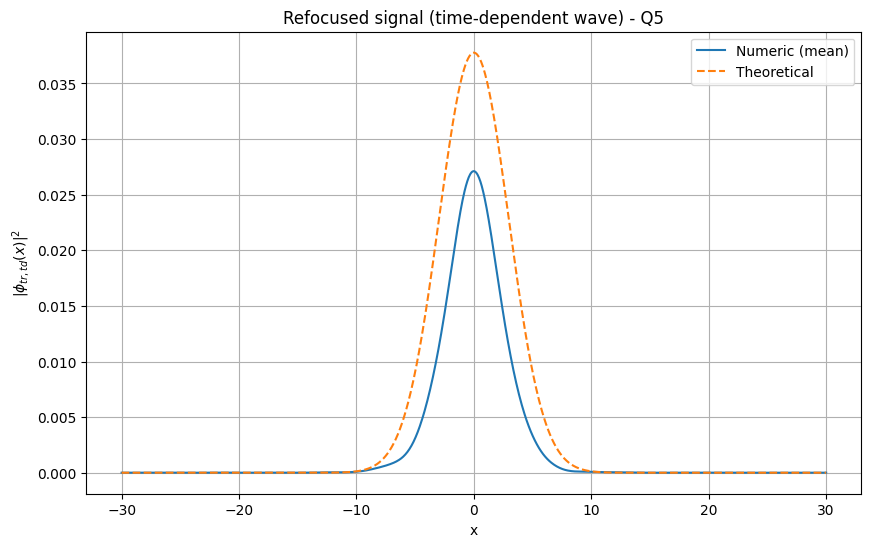

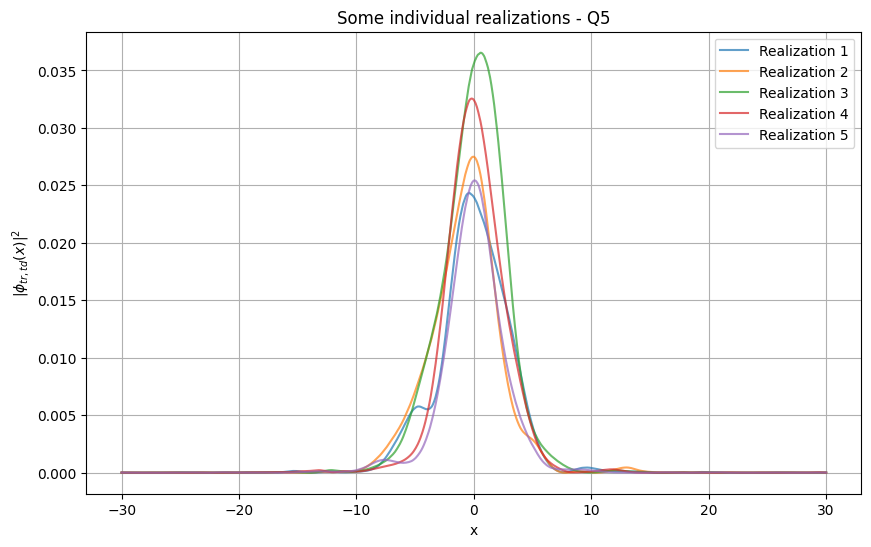

In [20]:
omega0 = 1.0
B = 0.75
num_freq = 20
omegas = cp.linspace(omega0 - B, omega0 + B, num_freq)

num_realizations_td = 100
phi_tr_time_dep_runs = []
for realization in tqdm(range(num_realizations_td), desc="Q5 GPU"):
    # Somme (cohérente) sur la bande de fréquences
    phi_tr_sum = cp.zeros_like(x, dtype=cp.complex128)
    for omega in omegas:
        k_current = omega
        mu = generate_random_potential_cupy(N_z, x, x_c, sigma)
        phi0_current = cp.exp(-x**2 / (radius**2))
        # Propagation directe
        phi_t_current = split_step_fourier_random_cupy(phi0_current, k_current, h, L, x, mu)
        # Miroir TR gaussien
        chi_M = cp.exp(-x**2 / (r_M**2))
        phi_tr_L_current = cp.conj(phi_t_current) * chi_M
        # Potentiel renversé
        mu_TR = cp.flipud(mu)
        phi_tr_current = split_step_fourier_TR_random_cupy(phi_tr_L_current, k_current, h, L, x, mu_TR)
        phi_tr_sum += phi_tr_current
    # Moyenne sur les fréquences
    phi_tr_sum /= num_freq
    phi_tr_time_dep_runs.append(phi_tr_sum)

phi_tr_time_dep_runs = cp.array(phi_tr_time_dep_runs)
phi_tr_time_dep_mean = cp.mean(phi_tr_time_dep_runs, axis=0)

k0 = omega0

r0 = radius
import math

a_tr = np.sqrt(1 + 4*L**2/(k0**2 * r0**2 * r_M**2) + 2j*L/(k0*r_M**2))
r_tr_sq = 1/(1/r_M**2 + 1/(r0**2 - 2j*L/k0)) + 2j*L/k0

gamma2 = (2 * sigma**2 * z_c) / (x_c**2)
r_a_sq_inv = gamma2 * k0**2 * L / 48
r_a = np.sqrt(1 / r_a_sq_inv)

phi_tr_theo_td = (1/a_tr) * np.exp(- (x_cpu**2)/ (np.abs(r_tr_sq)**2)) * np.exp(-(x_cpu**2)/(r_a**2))
phi_tr_theo_td_intensity = np.abs(phi_tr_theo_td)**2

phi_tr_time_dep_mean_cpu = cp.asnumpy(cp.abs(phi_tr_time_dep_mean)**2)

plt.figure(figsize=(10,6))
plt.plot(x_cpu, phi_tr_time_dep_mean_cpu, label="Numeric (mean)")
plt.plot(x_cpu, phi_tr_theo_td_intensity, '--', label="Theoretical")
plt.xlabel("x")
plt.ylabel(r"$|\phi_{tr,td}(x)|^2$")
plt.title("Refocused signal (time-dependent wave)")
plt.legend()
plt.grid(True)
plt.show()

# Affichage de quelques réalisations individuelles
plt.figure(figsize=(10,6))
for i in range(5):
    realization_i_cpu = cp.asnumpy(phi_tr_time_dep_runs[i])
    plt.plot(x_cpu, np.abs(realization_i_cpu)**2, label=f"Realization {i+1}", alpha=0.7)
plt.xlabel("x")
plt.ylabel(r"$|\phi_{tr,td}(x)|^2$")
plt.title("Some individual realizations")
plt.legend()
plt.grid(True)
plt.show()

We observe that:

The two curves are nearly superimposed, which validates both the multi-frequency paraxial modeling and the time reversal procedure.

The focusing is clearly marked at the center ($x = 0$) and decays rapidly as $|x|$ increases.

In addition, there is clear statistical stability: even though the medium is random, summing over a broad frequency band tends to stabilize the refocusing. In particular:

When the experiment is repeated with different realizations of the medium, the shape of the refocused lobe remains almost the same.

This effect can be explained by the accumulated coherence over the band $[ω_{0} - B, ω_{0} + B]$. The small phase fluctuations from one realization to another average out, keeping the overall focusing stable.

Thus, time reversal for time-dependent (multi-frequency) waves reinforces the robustness of the focusing—meaning that even in a random medium, the refocusing is nearly independent of the specific realization of the disorder as long as the contributions over all frequencies are combined.